## Maulana Ahmad Maliki
### maulanamaliki2007@gmail.com
### Kota Malang, Jawa Timur
---

In [1]:
#import lib
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 19:11:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.1MB/s    in 30s     

2020-11-02 19:12:02 (10.1 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# ekstrak file rockpaperscissors.zip 
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/rockpaperscissors'
# membuat traning direktori
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)

# membuat validation direktori
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(validation_dir)
validation_rock = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock)
validation_paper = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper)
validation_scissors = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors)

# membagi dataset images menjadi training dan testing 

rock_dir = '/tmp/rockpaperscissors/rock'
paper_dir = '/tmp/rockpaperscissors/paper'
scissors_dir = '/tmp/rockpaperscissors/scissors'

train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)


for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock,file))
for file in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(validation_paper,file))
for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(validation_scissors,file))

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax) # klasifikasi kelas menggunakan parameter activation softmax
])
# melakukan compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [7]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=256,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/100
256/256 - 8s - loss: 0.4444 - accuracy: 0.6396 - val_loss: 0.3629 - val_accuracy: 0.7900
Epoch 2/100
256/256 - 8s - loss: 0.1926 - accuracy: 0.8857 - val_loss: 0.0706 - val_accuracy: 0.9700
Epoch 3/100
256/256 - 7s - loss: 0.1546 - accuracy: 0.9189 - val_loss: 0.1848 - val_accuracy: 0.8900
Epoch 4/100
256/256 - 8s - loss: 0.1119 - accuracy: 0.9395 - val_loss: 0.0788 - val_accuracy: 0.9600
Epoch 5/100
256/256 - 7s - loss: 0.1228 - accuracy: 0.9424 - val_loss: 0.0907 - val_accuracy: 0.9400
Epoch 6/100
256/256 - 7s - loss: 0.1076 - accuracy: 0.9482 - val_loss: 0.1229 - val_accuracy: 0.9300
Epoch 7/100
256/256 - 7s - loss: 0.0891 - accuracy: 0.9600 - val_loss: 0.1628 - val_accuracy: 0.9300
Epoch 8/100
256/256 - 7s - loss: 0.0789 - accuracy: 0.9570 - val_loss: 0.0768 - val_accuracy: 0.9600
Epoch 9/100
256/256 - 8s - loss: 0.0661 - accuracy: 0.9668 - val_loss: 0.0875 - val_accuracy: 0.9900
Epoch 10/100
256/256 - 8s - loss: 0.0601 - accuracy: 0.9688 - val_loss: 0.0448 - val_accura

Saving 9OyGmAsWD5Ie6QIa.png to 9OyGmAsWD5Ie6QIa.png
Saving 6wuALDd920vZ0qZE.png to 6wuALDd920vZ0qZE.png
Saving 9zfyVkUcku0qc4Gu.png to 9zfyVkUcku0qc4Gu.png
Saving 1yeoLbmp4alVOtFv.png to 1yeoLbmp4alVOtFv.png
Saving 8cUuoeM7qSsAGoOv.png to 8cUuoeM7qSsAGoOv.png
Saving 2O9XPBJRT119drWX.png to 2O9XPBJRT119drWX.png
Saving dnXr5NzZKqzg8VgI.png to dnXr5NzZKqzg8VgI.png
Saving BtUfOjTzw9EEvNHO.png to BtUfOjTzw9EEvNHO.png
Saving 56VICUKU6RgoLTHW.png to 56VICUKU6RgoLTHW.png
Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO.png
Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png
Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png
Saving 7cNxwgrraQGeA1LA.png to 7cNxwgrraQGeA1LA.png
Saving 4QtEaLUAuzeJZKdK.png to 4QtEaLUAuzeJZKdK.png
Saving 1VoYiUgPE6h45MLu.png to 1VoYiUgPE6h45MLu.png
Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png


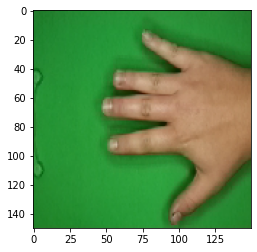

this picture is a  paper


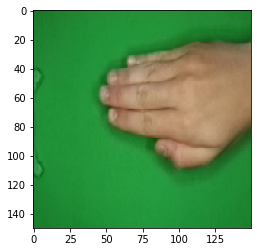

this picture is a  paper


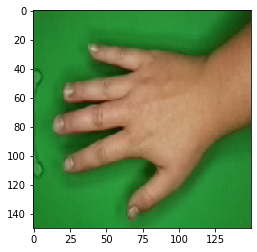

this picture is a  paper


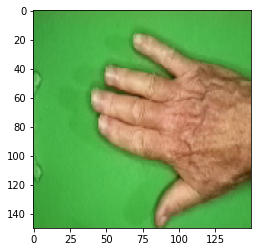

this picture is a  paper


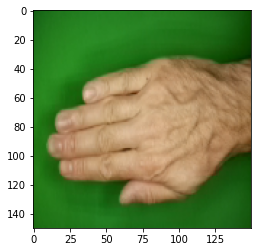

this picture is a  paper


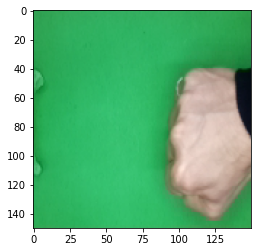

this picture is a  rock


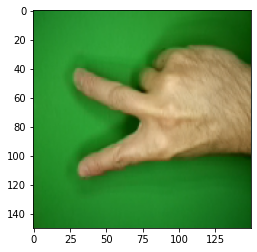

this picture is a  scissors


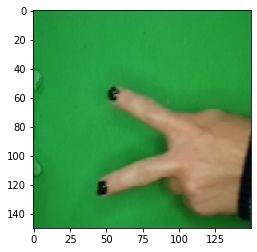

this picture is a  scissors


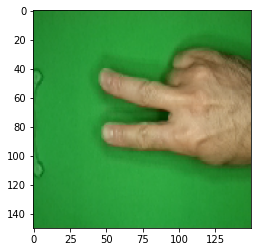

this picture is a  scissors


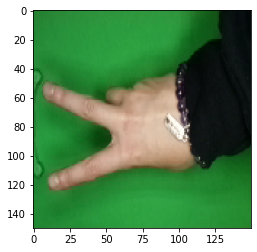

this picture is a  scissors


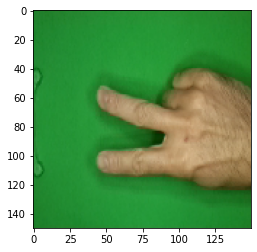

this picture is a  scissors


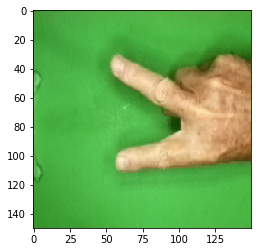

this picture is a  scissors


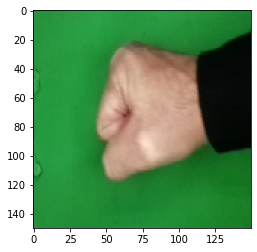

this picture is a  rock


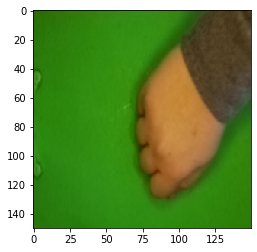

this picture is a  rock


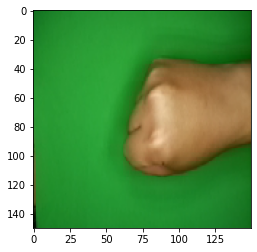

this picture is a  rock


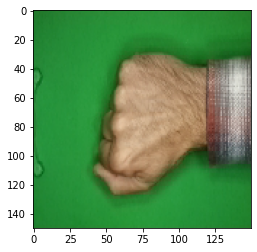

this picture is a  rock


In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

klasifikasi = dict(zip(range(3), ("paper","rock","scissors")))
uploaded = files.upload()

for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(img)
  plt.show()
  print("this picture is a ", klasifikasi[classes.argmax()])